
# Project: Noshow Data Analysis


<a id='intro'></a>
## Introduction

> The Noshow Medical Appointment Dataset consists of 110527 medical appointments its 14 associated variables (characteristics). The variables are:
>* PatientId: Identification of a patient
>* AppointmentID: Identification of each appointment
>* Gender: Male or Female
>* ScheduledDay: The day of the actuall appointment, when they have to visit the doctor
>* AppointmentDay: The day someone called or registered the appointment
>* Age: How old is the patient
>* Neighbourhood: Where the appointment takes place
>* Scholarship: True or False, indicates if the patient is in the Bolsa Familia program
>* Hipertension: True or False
>* Diabetes: True or False
>* Alcoholism: True or False
>* Handcap: True or False
>* SMS_received: 1 or more messages sent to the patient
>* No-show "No" indicates if the patient showed up to their appointment and "Yes" if they didn't show up

>The "No show" column will be used as the dependent variable since it tells if the patient show-up or no-show to the appointment and it is the most important for this analysis.

> <b>Questions</b>
>After familiarizing myself with the variables in the dataset, the questions I want to answer are:
>* What factors are important for us to know in order to predict if a patient will show up for their schedule appointment?
>* Does having the three medical conditions have to do with patient showing up more?
>* Does male patients with medical conditions show up more than female?
 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [36]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [37]:
#checking for numbers of rows and columns
df.shape

(110527, 14)

In [38]:
#checking for duplicate items
df.duplicated().sum()

0

In [39]:
# checking for null values
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

In [40]:
# columns and rows information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [41]:
# checking unique values in columns
print(df.Gender.unique())
print(sorted(df.Age.unique()))
print(sorted(df.Neighbourhood.unique()))
print(df.Scholarship.unique())
print(df.Hipertension.unique())
print(df.Diabetes.unique())
print(df.Alcoholism.unique())
print(df.Handcap.unique())
print(df.SMS_received.unique())
print(df['No-show'].unique())

['F' 'M']
[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
['AEROPORTO', 'ANDORINHAS', 'ANTÔNIO HONÓRIO', 'ARIOVALDO FAVALESSA', 'BARRO VERMELHO', 'BELA VISTA', 'BENTO FERREIRA', 'BOA VISTA', 'BONFIM', 'CARATOÍRA', 'CENTRO', 'COMDUSA', 'CONQUISTA', 'CONSOLAÇÃO', 'CRUZAMENTO', 'DA PENHA', 'DE LOURDES', 'DO CABRAL', 'DO MOSCOSO', 'DO QUADRO', 'ENSEADA DO SUÁ', 'ESTRELINHA', 'FONTE GRANDE', 'FORTE SÃO JOÃO', 'FRADINHOS', 'GOIABEIRAS', 'GRANDE VITÓRIA', 'GURIGICA', 'HORTO', 'ILHA DAS CAIEIRAS', 'ILHA DE SANTA MARIA', 'ILHA DO BOI', 'ILHA DO FRADE', 'ILHA DO PRÍNCIPE', 'ILHAS OCEÂNICAS DE TRINDADE', 'INHANGUETÁ', 'ITARARÉ', 'JABOUR', 'J

> After performing operations to inspect the data,we can conclude that the data :
>* Does not have missing or null values
>* does not have duplicates
>* Only the age column have values that are outliers(-1, 100 - 115). Age value cannot be -1 which will be removed but it's possible to have people who are 100 years and above.

### Data Cleaning 

> After Inspecting the data, I'm going to:
>* Drop columns that are not important to this analysis
>* Change incorrect datatypes
>* Rename columns
>* change column names to lower case letter
>* Remove outliers from age column
>* Add new columns



In [42]:
# drop columns that are not important to this analysis
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [43]:
# rename columns
df.rename(columns={'PatientId':'Patient_Id','AppointmentID': 'Appointment_ID','ScheduledDay':'Scheduled_Day'
                   ,'AppointmentDay':'Appointment_Day','Hipertension':'Hypertension'
                   ,'No-show' : 'No_show','Handcap' : 'Handicap'},inplace=True)


In [44]:
# change column names to lower case letter
df.rename(columns=lambda x: x.lower(),inplace=True)
df.columns

Index(['gender', 'scheduled_day', 'appointment_day', 'age', 'neighbourhood',
       'scholarship', 'hypertension', 'diabetes', 'alcoholism', 'handicap',
       'sms_received', 'no_show'],
      dtype='object')

In [45]:
df['no_show'] = df['no_show'].replace({'Yes':1,'No':0})

In [46]:
# change incorrect datatypes
df['scheduled_day'] = pd.to_datetime(df.scheduled_day).dt.date.astype('datetime64[ns]')
df['appointment_day'] = pd.to_datetime(df.appointment_day).dt.date.astype('datetime64[ns]')
df.dtypes

gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                     int64
dtype: object

In [47]:
# remove outliers from age column
df.drop(df[df['age']<0].index,inplace=True)
df.shape

(110526, 12)

In [48]:
#replace handicap values 2,3,4 to 1
df['handicap'] = df['handicap'].replace({2:1, 3:1, 4:1})

In [50]:
#add new column 
# Bin edges that will be used to "cut" the data into groups
bins = [0,17,35,115]

# Labels for the three age groups
labels =['Child','Youth','Adult']

In [51]:
# Creates age_category column
df['age_category'] = pd.cut(df.age, bins,labels=labels,include_lowest=True)

In [52]:
#display the cleaned dataset
df.head()

,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,age_category
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,Adult
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,Adult
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,Adult
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,Child
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,Adult


<a id='eda'></a>
## Exploratory Data Analysis

## Question 1 
### What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
>To answer this question,we will need to look at one variable at a time.

In [53]:
df.describe()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.020276,0.321029,0.201934
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.140943,0.466874,0.401445
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


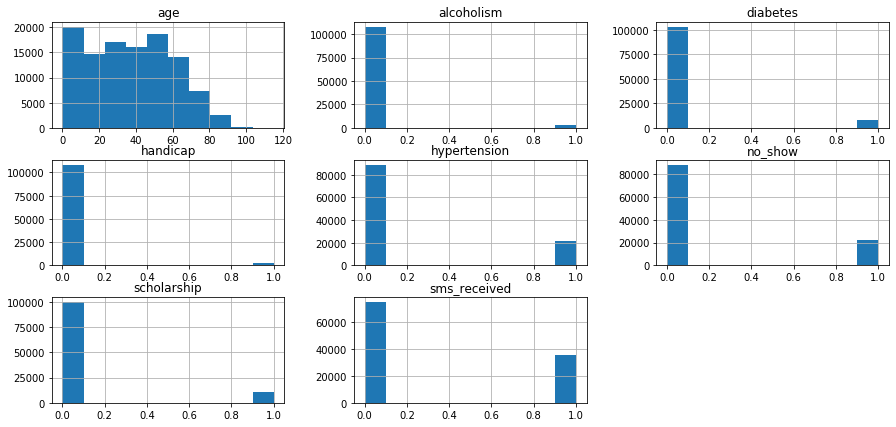

In [54]:
df.hist(figsize=(15,7));

>From the descriptive analysis and the visualization above we can see that;
>* The mean age of patients is  37 years.This means that most of the patients are below 60 years
>* more than 75% of patients  have no hypertention,scholarship,alcoholism, diabetics and not handicapped.
>* more than 50% does not receive SMS.
>* most patients doesn not miss appointment.

   ## Age
> I decided to create a new column named Age Category from the age column by cutting the age data into categories. The data was cut into categories pertaining to various stages e.g a patient that is within the range 0 - 17 will be in the 'Child' category, 18 - 35 will be in the 'Youth' category and 36 - 115 will be in the 'Adult' category.

In [55]:
#create masks for rows where the patients shows and where they did not show up
no_show = df.no_show == True
show = df.no_show == False

In [56]:
df.age[no_show].mean()

34.31766656212196

In [57]:
df.age[show].mean()

37.790504154999034

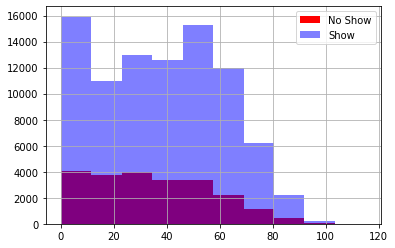

In [58]:
df.age[no_show].hist(label='No Show',color='r')
df.age[show].hist(alpha=0.5,label='Show',color='b');
plt.legend();

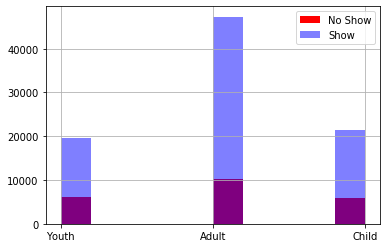

In [59]:
df.age_category[no_show].hist(label='No Show',color='r')
df.age_category[show].hist(alpha=0.5,label='Show',color='b')
plt.legend();

>From the visuals above, the mean age of patients that showed up for appointments ia approximately 38% while the mean age of patients that do not show up is approximately 34%.This means that adults shows up more for their appointments than teenagers or children.

## Gender

In [60]:
df.gender.value_counts()

F    71839
M    38687
Name: gender, dtype: int64

In [61]:
df.groupby('gender').no_show.value_counts()

gender  no_show
F       0          57245
        1          14594
M       0          30962
        1           7725
Name: no_show, dtype: int64

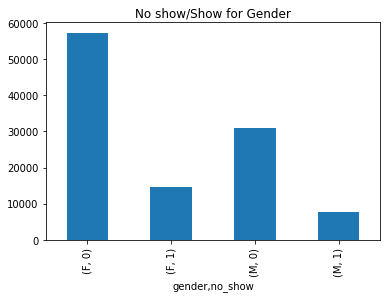

In [62]:
df.groupby('gender').no_show.value_counts().plot(kind='bar', title='No show/Show for Gender');


In [63]:
df[df.no_show == 0].groupby(['gender']).size()/df.groupby(['gender']).size()

gender
F    0.796851
M    0.800321
dtype: float64

> out of 110527 patients:
>* 71839 were females and 38687 were males. This means that females takes care of their health than males.
>* 57245 females showed up for their appointments, while 14594 did not show up.
>* 30962 males showed up for their appointments, while 7725 did not show up
> The ratio of female to males that showed up for their appointments is the same.

# Neighborhood

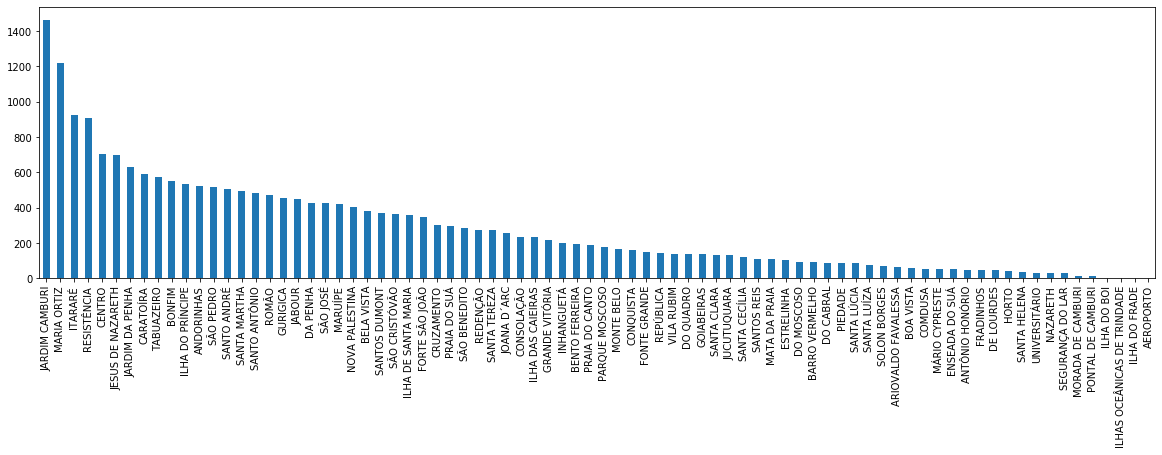

In [64]:
#neighborhood of no show patients 
df.neighbourhood[no_show].value_counts().plot(figsize=(20,5),kind='bar');

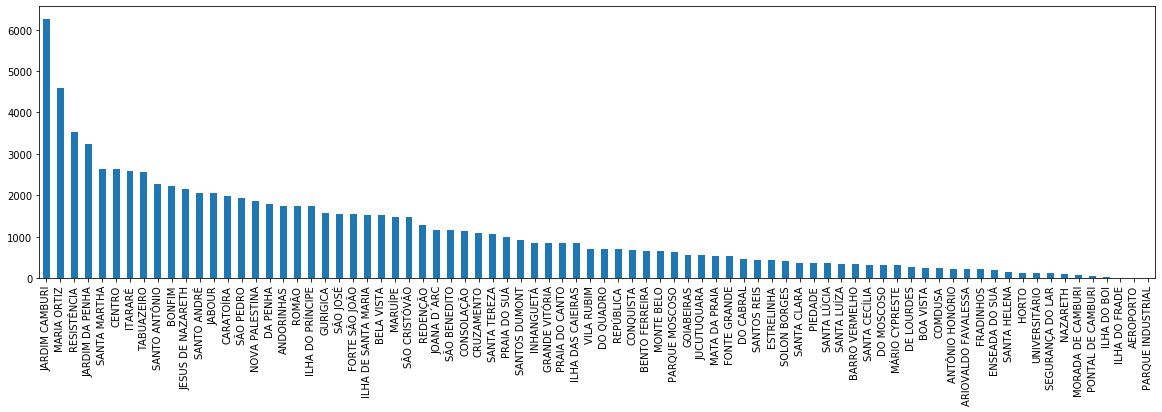

In [65]:
#neighborhood of show patients 
df.neighbourhood[show].value_counts().plot(figsize=(20,5),kind='bar');

>we can see from the visualization above that the top two neighorhood(jardim camburi, maria ortiz)has the higest number of show and no show for all patients

In [66]:
show_ratio = df[df.no_show == 0].groupby(['neighbourhood']).size()/df.groupby(['neighbourhood']).size()

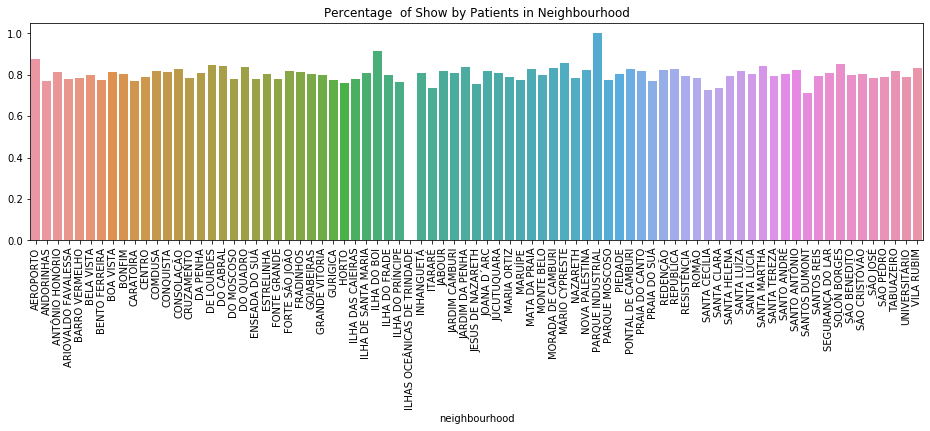

In [67]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.barplot(x=show_ratio.index, y=show_ratio)
ax.set_title("Percentage  of Show by Patients in Neighbourhood")
plt.show()

> Almost 80% of patients showed up for their appointmentments in their neigbourhood. This means that Neigborhood does not affect patients showing up. 

# Scholarship

In [68]:
df.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [69]:
df.scholarship[show].value_counts(),df.scholarship[no_show].value_counts()

(0    79924
 1     8283
 Name: scholarship, dtype: int64,
 0    19741
 1     2578
 Name: scholarship, dtype: int64)

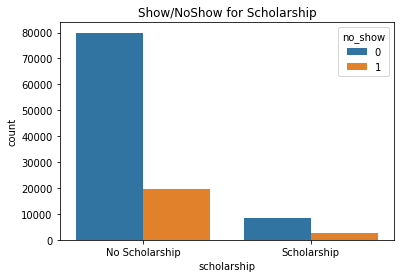

In [70]:
ax = sns.countplot(x=df.scholarship, hue=df.no_show, data=df)
ax.set_title("Show/NoShow for Scholarship")
x_ticks_labels=['No Scholarship', 'Scholarship']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [193]:
df[df.no_show == 0].groupby(['scholarship']).size()/df.groupby(['scholarship']).size()

scholarship
0    0.801926
1    0.762637
dtype: float64

>* From the visualization above, we can see that out of 110526 patients, 99665 patients has no scholarship and 10861 has Scholarship.
>* 79924 patients out of those that do not have scholarship showed up for their appointments while 19741 patients did not show up. This means that almost 80% showed up.
>* 8283 patients out of those that have scholarship showed up for their appointments while 2578 patients did not show up. This means that almost 76% showed up.
>* Patients who do not have scholarship are likely to how up more that those who have.
>* we can say that scholarship is not one of the factors that is important for us to predict if a patient will show up for their scheduled appointment.

# Hypertension

In [194]:
df.hypertension.value_counts()

0    88725
1    21801
Name: hypertension, dtype: int64

In [75]:
#count of show/noshow of diabetes
df.hypertension[show].value_counts(),df.hypertension[no_show].value_counts()

(0    70178
 1    18029
 Name: hypertension, dtype: int64,
 0    18547
 1     3772
 Name: hypertension, dtype: int64)

In [76]:
#percentage of hypertension
hypertension= df[df.no_show == 0].groupby(['hypertension']).size()/df.groupby(['hypertension']).size()
hypertension

hypertension
0    0.790961
1    0.826980
dtype: float64

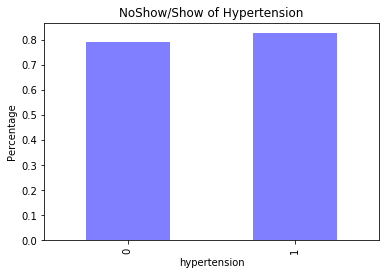

In [77]:
hypertension= df[df.no_show == 0].groupby(['hypertension']).size()/df.groupby(['hypertension']).size()
hypertension.plot(kind='bar',title='NoShow/Show of Hypertension',color ='b',alpha=0.5)
plt.xlabel('hypertension')
plt.ylabel('Percentage');

>* From the visualization above we can see that approximately 83% of patients that have hypertension showed up for their appointments, while 79% of patients that do no have hypertention showed up for their appointments. This means that patients who have hypertention tends to show up for their appointments that those that do not have hypertention.
>* we can say that hypertention is one of the factors that is important for us to predict if a patient will show up for their scheduled appointment.

# Diabetics

In [78]:
df.diabetes.value_counts()

0    102583
1      7943
Name: diabetes, dtype: int64

In [74]:
#count of show/noshow of diabetes
df.diabetes[show].value_counts(),df.diabetes[no_show].value_counts()

(0    81694
 1     6513
 Name: diabetes, dtype: int64,
 0    20889
 1     1430
 Name: diabetes, dtype: int64)

In [79]:
#percentage of diabetes
diabetes = df[df.no_show == 0].groupby(['diabetes']).size()/df.groupby(['diabetes']).size()
diabetes

diabetes
0    0.796370
1    0.819967
dtype: float64

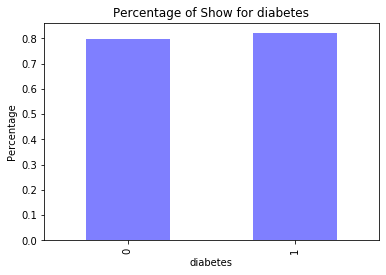

In [80]:
diabetes= df[df.no_show == 0].groupby(['diabetes']).size()/df.groupby(['diabetes']).size()
diabetes.plot(kind='bar',title='Percentage of Show for diabetes',color ='b',alpha=0.5)
plt.xlabel('diabetes')
plt.ylabel('Percentage');

>* From the visualization above we can see that approximately 82% of 7943 patients that have diabetes showed up for their appointments, while 79% 102583 of patients that do no have diabetes showed up for their appointments. This means that patients who have diabetes tends to show up for their appointments that those that do not have diabetes.
>* we can say that diabetes is one of the factors that is important for us to predict if a patient will show up for their scheduled appointment.

# Alcoholism

In [81]:
df.alcoholism.value_counts()

0    107166
1      3360
Name: alcoholism, dtype: int64

In [82]:
#count of show/noshow of alcoholism
df.alcoholism[show].value_counts(),df.alcoholism[no_show].value_counts()

(0    85524
 1     2683
 Name: alcoholism, dtype: int64,
 0    21642
 1      677
 Name: alcoholism, dtype: int64)

In [83]:
#percentage of alcoholism
alcoholism = df[df.no_show == 0].groupby(['alcoholism']).size()/df.groupby(['alcoholism']).size()
alcoholism

alcoholism
0    0.798052
1    0.798512
dtype: float64

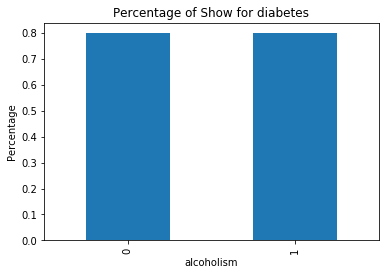

In [84]:
alcoholism.plot(kind='bar',title='Percentage of Show for diabetes')
plt.xlabel('alcoholism')
plt.ylabel('Percentage');

>* From the visualization above, we can see that approximately 80% of 3360 patients with alcoholism showed up for their appointments and also 80% 107166 of patients that do not suffer from alcoholism  showed up for their appointments. This means that alcoholism does not determine whether a patient will show up or not.
>* we can say that alcoholism  is not one of the factors that is important for us to predict if a patient will show up for their scheduled appointment.

# Handicap

In [231]:
df.handicap.value_counts()

0    108285
1      2241
Name: handicap, dtype: int64

In [85]:
#count of show/noshow of handicap
df.handicap[show].value_counts(),df.handicap[no_show].value_counts()

(0    86373
 1     1834
 Name: handicap, dtype: int64,
 0    21912
 1      407
 Name: handicap, dtype: int64)

In [86]:
#percentage of handicap
handicap = df[df.no_show == 0].groupby(['handicap']).size()/df.groupby(['handicap']).size()
handicap

handicap
0    0.797645
1    0.818385
dtype: float64

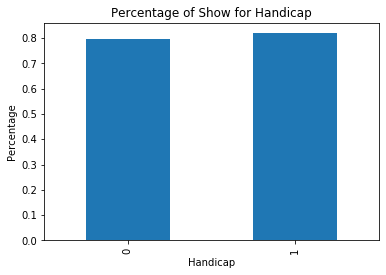

In [87]:
handicap.plot(kind='bar',title='Percentage of Show for Handicap')
plt.xlabel('Handicap')
plt.ylabel('Percentage');

>* From the visualization above we can see that approximately 82% of 2241 patients that  are handicap showed up for their appointments, while 79% 108285 of patients that are not handicap showed up for their appointments. This means that patients who are handicap tends to show up for their appointments that those that are not handicap.
>* we can say that handicap is one of the factors that is important for us to predict if a patient will show up for their scheduled appointment.

# SMS_received   

In [88]:
df.sms_received.value_counts()   

0    75044
1    35482
Name: sms_received, dtype: int64

In [89]:
#count of show/noshow of sms received
df.sms_received[show].value_counts(),df.sms_received[no_show].value_counts()

(0    62509
 1    25698
 Name: sms_received, dtype: int64,
 0    12535
 1     9784
 Name: sms_received, dtype: int64)

In [90]:
#percentage of sms received
sms_received = df[df.no_show == 0].groupby(['sms_received']).size()/df.groupby(['sms_received']).size()
sms_received

sms_received
0    0.832965
1    0.724255
dtype: float64

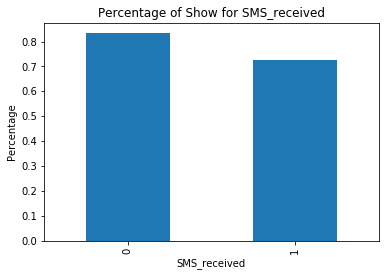

In [91]:
sms_received.plot(kind='bar',title='Percentage of Show for SMS_received')
plt.xlabel('SMS_received')
plt.ylabel('Percentage');

>* From the visualization above, we can see that approximately 72% of 35482 patients that received SMS showed up for their appointments, while 83% 75044 of patients that do not receive SMS showed up for their appointments. This means that receiving SMS does not determine whether a patient will show up or not.
>* we can say that SMS_received is not one of the factors or features that is important for us to predict if a patient will show up for their scheduled appointment.


> The factors/features that are important for us to predict if a patient will show up for their scheduled
appointment are:
>* Age
>* Hypertension
>* Diabetes
>* handicap

# Question 2
### Does having the three medical conditions have to do with patient showing up more?

In [92]:
#total number of patients with medical conditions
medical_conditions = len(df[((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
medical_conditions

256

In [93]:
#total number of patients with medical conditions that shows
patient_show = len(df[(df.no_show == 0) & ((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
patient_show

210

In [94]:
#total number of patients with medical conditions that did not show
patient_no_show = len(df[(df.no_show == 1) & ((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
patient_no_show

46

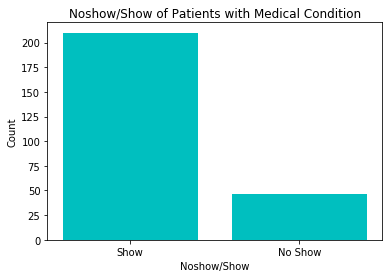

In [95]:
locations = [1, 2]
heights = [patient_show, patient_no_show]
labels = ['Show', 'No Show']
plt.bar(locations, heights, tick_label=labels,color='c')
plt.title('Noshow/Show of Patients with Medical Condition')
plt.xlabel('Noshow/Show')
plt.ylabel('Count');

>* From the analysis above, 210 patients out of 256 patients that has diabetes, hypertension and alcoholism showed up for appointments while 46 patients that has these sicknesses did not show up

>we can see that patients are likely to show up more if they have has diabetes, hypertension and alcoholism than patients that do not have these sickness.

# Question 3
### Does male patients with medical conditions show up more than female?

In [96]:
#total number of male patients with condition
total_male_patients = len(df[(df.gender == 'M') & ((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
total_male_patients

163

In [97]:
#total number of female patients with condition
total_female_patients = len(df[(df.gender == 'F') & ((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
total_female_patients

93

In [98]:
#total number of male patients with condition that show
male_patients_show = len(df[(df.gender == 'M') &(df.no_show==0) & ((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
male_patients_show

137

In [99]:
#total number of female patients with condition that show
female_patients = len(df[(df.gender == 'F') &(df.no_show==0) & ((df.hypertension == 1) & (df.diabetes== 1) & (df.alcoholism== 1))])
female_patients

73

In [100]:
#proportion of male
proportion_male = male_patients_show/total_male_patients
proportion_male

0.8404907975460123

In [101]:
#proportion of female
proportion_female = female_patients/total_female_patients
proportion_female

0.7849462365591398

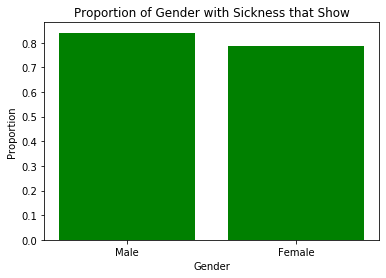

In [102]:
locations = [1, 2]
heights = [proportion_male, proportion_female]
labels = ['Male', 'Female']
plt.bar(locations, heights, tick_label=labels,color='g')
plt.title('Proportion of Gender with Sickness that Show')
plt.xlabel('Gender')
plt.ylabel('Proportion');

>* From the analysis above, approximately 84% of male patients with diabetes, hypertension and alcoholism showed up for their appointments, while 78% of females showed up
>* we can say that male patients with sickness like diabetes, hypertension and alcoholism are likely to show up more than female patients with these sickness.

# Limitation
>Inconsistences in the dataset eg Scheduling date.

>Some attribute that would have helped us in making better analysis and predictions for the NoShow of a patient are missing.Attribute like:
>* Reason for the appointment
>* Consultation doctor specialization
>* Is the the patient new?
>* Is the hospital far or near to patients home?

<a id='conclusions'></a>
## Conclusions

>* Most of the columns in our data set show relationships with whether the patient showed up to the appointment.
>* Sending SMS to patients to remind them of their appointments is of no effect on whether a patient will show up
>* The female group and Young group take up mainly the ‘no-show’ group.
>* Statistical modeling would have been better to explain or predict no_show the best, and that is beyond the scope of this study.
